## Ex1: Dùng Numpy implement thuật toán dbscan, test thử với dữ liệu.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

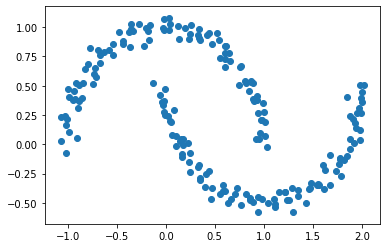

In [14]:
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1])

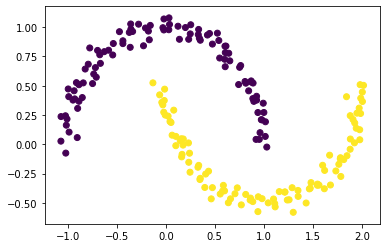

In [15]:
dbscan = DBSCAN(eps=0.2, min_samples=3)
dbscan.fit(Xmoon)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], c = dbscan.labels_)

In [16]:
class Dbscan_clus:
    def __init__(self, radius, min_sample, data):
        self.radius = radius
        self.min_sample = min_sample
        self.data = pd.DataFrame(data, columns=['x', 'y'])
        self.data['visited'] = 0
        self.data['cluster'] = -1

    def get_dist(self, x1, x2):
        return np.sqrt(((x1 - x2) ** 2).sum(axis=0))

    def get_neighbor(self, row):
        distance = self.data[['x', 'y']].apply(lambda x: self.get_dist(x, row[['x', 'y']]), axis=1)
        return list(self.data[distance <= self.radius].index)

    def clustering(self, row_ind, neighbors, cluster):
        self.data.loc[row_ind, 'cluster'] = cluster
        while len(neighbors) > 0:
            nb_ind = neighbors.pop()
            if self.data.loc[nb_ind, 'visited'] == 0:
                self.data.loc[nb_ind, 'visited'] = 1
                nb_neighbors = self.get_neighbor(self.data.loc[nb_ind, :])
                if len(nb_neighbors) >= self.min_sample:
                    neighbors = neighbors + nb_neighbors
            if self.data.loc[nb_ind, 'cluster'] == -1:
                self.data.loc[nb_ind, 'cluster'] = cluster

    def fit(self):
        cluster = 0
        while (self.data['visited'] == 0).sum() > 0:
            row_ind = self.data[self.data['visited'] == 0].index[0]
            self.data.loc[row_ind, 'visited'] = 1
            neighbors = self.get_neighbor(self.data.loc[row_ind, :])
            if len(neighbors) < self.min_sample:
                continue
            else:
                cluster += 1
                self.clustering(row_ind, neighbors, cluster)
        self.labels = self.data['cluster']

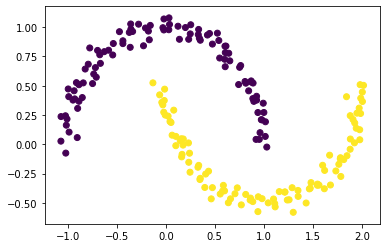

In [17]:
n = Dbscan_clus(0.2, 3, Xmoon)
n.fit()
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], c = n.labels)

### Ex2: Ý nghĩa tham số radius, min sample trong thuật toán dbscan?Nếu chỉ số lớn, nhỏ ảnh hưởng thế nào tới thuật toán?

- Radius: Một giá trị khoảng cách được sử dụng để xác định vùng lân cận radius của bất kỳ điểm dữ liệu nào.
- Min sample: Số điểm dữ liệu tối thiểu để xác định một cụm. Số lượng min sample không bao gồm điểm ở tâm.

- Nếu radius được chọn quá nhỏ, một phần lớn dữ liệu sẽ không được phân cụm và được xem là nhiễu, trong khi đối với giá trị quá cao, các cụm sẽ hợp nhất và phần lớn các điểm sẽ nằm trong cùng một cụm.
- Min sample thấp giúp thuật toán xây dựng nhiều cụm hơn với nhiều nhiễu hoặc ngoại lệ hơn. Min sample cao hơn sẽ đảm bảo các cụm mạnh mẽ hơn nhưng nếu nó quá lớn, các cụm nhỏ hơn sẽ được kết hợp thành các cụm lớn hơn.